In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 1.

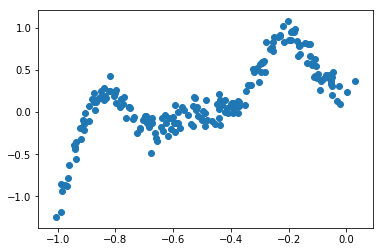

In [3]:
plt.scatter(x, y)

In [4]:
xx = np.linspace(min(x), max(x), num=200)

In [5]:
import mylibrary.nnlib as tnn
hidden_size = 1

optimizer = tnn.Adam()
la1 = tnn.NonLinearLayer(1, hidden_size, activation=tnn.Relu(), optimizer=optimizer)
la2 = tnn.LinearLayer(hidden_size, 1, optimizer=optimizer)

In [6]:
# one shot trying

In [7]:
x_data = x.reshape(-1,1)
y_data = y.reshape(-1,1)
# xx_data = xx.reshape(-1,1)

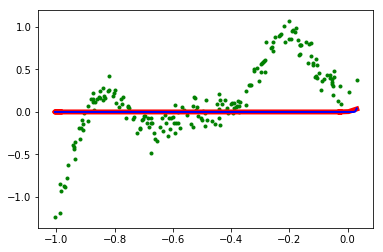

In [8]:
a1 = la1.forward(x_data)
a2 = la2.forward(a1)

%matplotlib inline
plt.scatter(x, y, marker='.', c='g')
plt.plot(x, a2, 'r', lw=5)
for out in a1.T:
    plt.plot(xx, out, 'b', lw=2)

In [9]:
loss = tnn.MseLoss.loss(a1, y_data)
loss_del = tnn.MseLoss.del_loss(a1, y_data)
print(loss)

0.09728297344167584


In [10]:
da1 = la2.backward(loss_del)
dx = la1.backward(da1)

In [11]:
dx.shape

(200, 1)

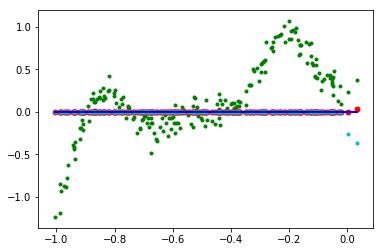

In [12]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g')
plt.scatter(x, a2.reshape(-1), marker='.', c='r', lw=3)
plt.scatter(x, dx.reshape(-1), marker='.', c='c', lw=1)
plt.plot(x, np.zeros_like(x), c='b', lw=2)

In [13]:
hidden_size = 1

optimizer = tnn.Adam()
la1 = tnn.NonLinearLayer(1, hidden_size, activation=tnn.Relu(), optimizer=optimizer)
la2 = tnn.LinearLayer(hidden_size, 1, optimizer=optimizer)

_______________________
epoch 0
Loss 0.09733342464588944
Weight 1 
 [[0.41512898]]
Biases 1 
 [0.00999511]
Weight 2 
 [[1.08767283]]
Biases 2 
 [0.01]


_______________________
epoch 10
Loss 0.08242747238373227
Weight 1 
 [[0.3569476]]
Biases 1 
 [0.10222166]
Weight 2 
 [[1.16285496]]
Biases 2 
 [0.10420327]


_______________________
epoch 20
Loss 0.06871863388504851
Weight 1 
 [[0.27036614]]
Biases 1 
 [0.20317502]
Weight 2 
 [[1.26647425]]
Biases 2 
 [0.14787083]


_______________________
epoch 30
Loss 0.06255286118292938
Weight 1 
 [[0.33901726]]
Biases 1 
 [0.23461138]
Weight 2 
 [[1.37283625]]
Biases 2 
 [0.09758989]


_______________________
epoch 40
Loss 0.056387898638336466
Weight 1 
 [[0.41309126]]
Biases 1 
 [0.26568239]
Weight 2 
 [[1.49459881]]
Biases 2 
 [0.03678096]


_______________________
epoch 50
Loss 0.050896151621043204
Weight 1 
 [[0.45997413]]
Biases 1 
 [0.3255052]
Weight 2 
 [[1.62292661]]
Biases 2 
 [-0.00370207]


_______________________
epoch 60
Loss 0.046978

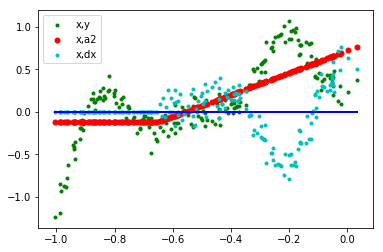

In [14]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100):
    a1 = la1.forward(x_data)
    a2 = la2.forward(a1)
    loss = tnn.MseLoss.loss(a2, y_data)
    loss_del = tnn.MseLoss.del_loss(a2, y_data)
    
    da1 = la2.backward(loss_del)
    dx = la1.backward(da1)
    
    la1.update()
    la2.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a2.reshape(-1), marker='.', c='r', lw=3, label='x,a2')
        plt.scatter(x, dx.reshape(-1), marker='.', c='c', lw=1, label='x,dx')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        print("Weight 1", '\n', la1.weights)
        print("Biases 1", '\n', la1.bias)
        print("Weight 2", '\n', la2.weights)
        print("Biases 2", '\n', la2.bias)
        
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

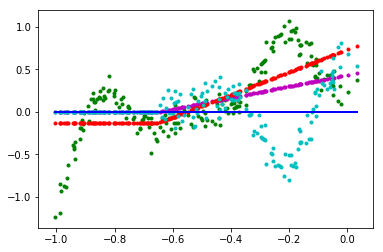

In [15]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g')
plt.scatter(x, a1.reshape(-1), marker='.', c='m', lw=1)
plt.scatter(x, a2.reshape(-1), marker='.', c='r', lw=1)
plt.scatter(x, dx.reshape(-1), marker='.', c='c', lw=1)
plt.plot(x, np.zeros_like(x), c='b', lw=2)
# plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1)

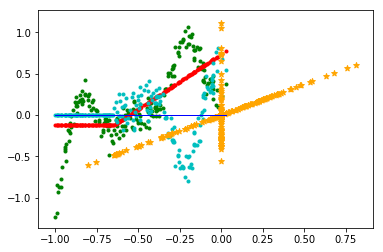

In [16]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g')
plt.scatter(x, a2.reshape(-1), marker='.', c='r', lw=1)
plt.scatter(x, dx.reshape(-1), marker='.', c='c', lw=1)
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.scatter(dx.reshape(-1), loss_del.reshape(-1), marker='*', c='orange', lw=1)
# Relation not linear between dx and dy

In [17]:
'''
The error on x (dx) seems to be okay in linear region of relu.
The error is shifted to zero in the zeri region of the relu. It is because the gradient is zero in the zero region.

The region should also produce error. The error in vanilla relu network is incomplete.
The output by zero region also counts. Therefore we should take it in account.

The resnet makes this consideration by adding skip connections.
Hence the error shows up in x directly from the y, rather than from a1.  
[(there are only non linear approximation in neural networks,
  relu(Wx+b), there are no linear layer.
  we now add relu(Wx+b) + W2x)]

We can also add residual block 
'''
#Lets GO

'\nThe error on x (dx) seems to be okay in linear region of relu.\nThe error is shifted to zero in the zeri region of the relu. It is because the gradient is zero in the zero region.\n\nThe region should also produce error. The error in vanilla relu network is incomplete.\nThe output by zero region also counts. Therefore we should take it in account.\n\nThe resnet makes this consideration by adding skip connections.\nHence the error shows up in x directly from the y, rather than from a1.  \n[(there are only non linear approximation in neural networks,\n  relu(Wx+b), there are no linear layer.\n  we now add relu(Wx+b) + W2x)]\n\nWe can also add residual block \n'

In [18]:
hidden_size = 1

optimizer = tnn.SGD()
la1 = tnn.NonLinearLayer(1, hidden_size, activation=tnn.Relu(), optimizer=optimizer)
la1l = tnn.LinearLayer(1, 1, optimizer=optimizer)
la2 = tnn.LinearLayer(hidden_size, 1, optimizer=optimizer)

In [ ]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1 = la1.forward(x_data)
    a1l = la1l.forward(x_data)
    a2_ = la2.forward(a1)
    a2 = a2_ + a1l
    loss = tnn.MseLoss.loss(a2, y_data)
    loss_del = tnn.MseLoss.del_loss(a2, y_data)
    
    da1 = la2.backward(loss_del)
    dxl = la1l.backward(loss_del)
    
    dx_ = la1.backward(da1)
    dx = dx_+dxl
    
    la1.update()
    la2.update()
    la1l.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a2_.reshape(-1), marker='.', c='y', lw=3, label='x,a2_')
        plt.scatter(x, a1l.reshape(-1), marker='.', c='orange', lw=3, label='x,a1l')
        plt.scatter(x, a2.reshape(-1), marker='.', c='r', lw=3, label='x,a2')
        
        plt.scatter(x, dx.reshape(-1), marker='.', c='c', lw=1, label='x,dx')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        print("Weight 1", '\n', la1.weights)
        print("Biases 1", '\n', la1.bias)
        print("Weight 2", '\n', la2.weights)
        print("Biases 2", '\n', la2.bias)
        print("Weight skip", '\n', la1l.weights)
        print("Biases skip", '\n', la1l.bias)
        
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 1.8955904125054832
Weight 1 
 [[-0.62194047]]
Biases 1 
 [-0.02813371]
Weight 2 
 [[-1.55105763]]
Biases 2 
 [0.0180833]
Weight skip 
 [[2.31787162]]
Biases skip 
 [0.0180833]


_______________________
epoch 10
Loss 0.7859517718134273
Weight 1 
 [[-0.49577582]]
Biases 1 
 [-0.2161244]
Weight 2 
 [[-1.5183688]]
Biases 2 
 [0.15590162]
Weight skip 
 [[2.23277939]]
Biases skip 
 [0.15590162]


_______________________
epoch 20
Loss 0.4233596785910364
Weight 1 
 [[-0.4250863]]
Biases 1 
 [-0.30429991]
Weight 2 
 [[-1.51159414]]
Biases 2 
 [0.24777164]
Weight skip 
 [[2.17490791]]
Biases skip 
 [0.24777164]


_______________________
epoch 30
Loss 0.2743361039048249
Weight 1 
 [[-0.39131706]]
Biases 1 
 [-0.34260548]
Weight 2 
 [[-1.51057782]]
Biases 2 
 [0.31569581]
Weight skip 
 [[2.13115583]]
Biases skip 
 [0.31569581]


_______________________
epoch 40
Loss 0.2002879581450972
Weight 1 
 [[-0.38116722]]
Biases 1 
 [-0.35342828]
Weight 2 
 [[-1.51046794]

Weight 1 
 [[-0.38369077]]
Biases 1 
 [-0.35208718]
Weight 2 
 [[-1.51079212]]
Biases 2 
 [0.52419453]
Weight skip 
 [[1.76653958]]
Biases skip 
 [0.52419453]


_______________________
epoch 400
Loss 0.06331507745811508
Weight 1 
 [[-0.38378977]]
Biases 1 
 [-0.35205594]
Weight 2 
 [[-1.51080999]]
Biases 2 
 [0.52280227]
Weight skip 
 [[1.7610274]]
Biases skip 
 [0.52280227]


_______________________
epoch 410
Loss 0.06297687484456867
Weight 1 
 [[-0.3839133]]
Biases 1 
 [-0.35199912]
Weight 2 
 [[-1.51082813]]
Biases 2 
 [0.52141616]
Weight skip 
 [[1.75555727]]
Biases skip 
 [0.52141616]


_______________________
epoch 420
Loss 0.06264373384516793
Weight 1 
 [[-0.38395711]]
Biases 1 
 [-0.35203045]
Weight 2 
 [[-1.51084656]]
Biases 2 
 [0.52003645]
Weight skip 
 [[1.75012895]]
Biases skip 
 [0.52003645]


_______________________
epoch 430
Loss 0.06231548804365923
Weight 1 
 [[-0.38400186]]
Biases 1 
 [-0.35206202]
Weight 2 
 [[-1.51086529]]
Biases 2 
 [0.51866285]
Weight skip 
 [[1.7



_______________________
epoch 770
Loss 0.0535767535243229
Weight 1 
 [[-0.38750979]]
Biases 1 
 [-0.35165977]
Weight 2 
 [[-1.51166702]]
Biases 2 
 [0.47723643]
Weight skip 
 [[1.58326401]]
Biases skip 
 [0.47723643]


_______________________
epoch 780
Loss 0.05337970980240358
Weight 1 
 [[-0.38756121]]
Biases 1 
 [-0.35172537]
Weight 2 
 [[-1.51169546]]
Biases 2 
 [0.47616372]
Weight skip 
 [[1.57909571]]
Biases skip 
 [0.47616372]


_______________________
epoch 790
Loss 0.05318554052108262
Weight 1 
 [[-0.38763691]]
Biases 1 
 [-0.35176542]
Weight 2 
 [[-1.51172419]]
Biases 2 
 [0.47509812]
Weight skip 
 [[1.57495856]]
Biases skip 
 [0.47509812]


_______________________
epoch 800
Loss 0.05299422402751755
Weight 1 
 [[-0.38769034]]
Biases 1 
 [-0.35183119]
Weight 2 
 [[-1.51175319]]
Biases 2 
 [0.47404]
Weight skip 
 [[1.570852]]
Biases skip 
 [0.47404]


_______________________
epoch 810
Loss 0.05280570369233801
Weight 1 
 [[-0.38776776]]
Biases 1 
 [-0.35187169]
Weight 2 
 [[-1.

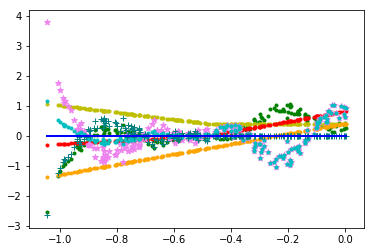

In [33]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a2_.reshape(-1), marker='.', c='y', lw=1, label='x,a2_')
plt.scatter(x, a1l.reshape(-1), marker='.', c='orange', lw=1, label='x,a1l')
plt.scatter(x, a2.reshape(-1), marker='.', c='r', lw=1, label='x,a2')

plt.scatter(x, dxl.reshape(-1), marker='*', c='violet', lw=1, label='x,dxl')
plt.scatter(x, dx.reshape(-1), marker='.', c='c', lw=1, label='x,dx')
plt.scatter(x, dx_.reshape(-1), marker='+', c='teal', lw=1, label='x,dx_')

plt.plot(x, np.zeros_like(x), c='b', lw=2)
# plt.legend()

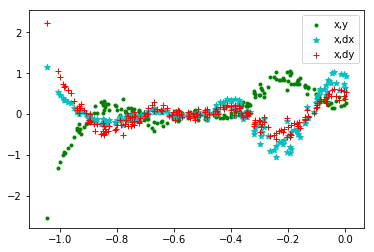

In [34]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, loss_del.reshape(-1), marker='+', c='r', lw=1, label='x,dy')
plt.legend()

In [35]:
# here it is.. the error problem is partially solved; the scaling of the dx is not proper
# now solving the error : dx till error decrreases to threshold
dx.mean()

0.0033147501383539984

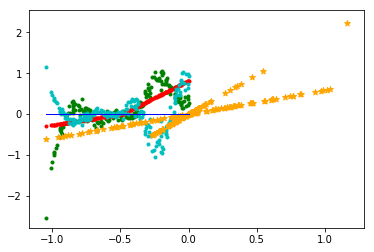

In [36]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g')
plt.scatter(x, a2.reshape(-1), marker='.', c='r', lw=1)
plt.scatter(x, dx.reshape(-1), marker='.', c='c', lw=1)
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.scatter(dx.reshape(-1), loss_del.reshape(-1), marker='*', c='orange', lw=1)
# Relation not linear between dx and dy

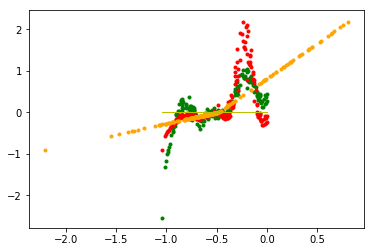

In [51]:
new_x = x_data - dx
_a1 = la1.forward(new_x)
_a1l = la1l.forward(new_x)
_a2_ = la2.forward(_a1)
_a2 = _a2_ + _a1l
_dy = tnn.MseLoss.del_loss(_a2, y_data)

# _loss = tnn.MseLoss.loss(a2, y_data)
# _loss_del = tnn.MseLoss.del_loss(a2, y_data)
# _da1 = la2.backward(loss_del)
# _dxl = la1l.backward(loss_del)
# _dx_ = la1.backward(da1)
# _dx = dx_+dxl

%matplotlib inline
plt.scatter(x, y, marker='.', c='g')
plt.scatter(x, _a2.reshape(-1), marker='.', c='r', lw=1)
plt.scatter(new_x, _a2.reshape(-1), marker='.', c='orange', lw=1)
# plt.scatter(x, _dy.reshape(-1), marker='+', c='b', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='y', lw=1)

In [129]:
ndx = dx

1.6224391898118844


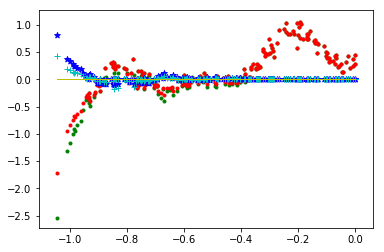

In [141]:
new_x = x_data - 0.3*ndx
_a1 = la1.forward(new_x)
_a1l = la1l.forward(new_x)
_a2_ = la2.forward(_a1)
_a2 = _a2_ + _a1l


_dy = tnn.MseLoss.del_loss(_a2, y_data)
_da1 = la2.backward(_dy)
_dxl = la1l.backward(_dy)

_dx_ = la1.backward(_da1)
_dx = _dx_+_dxl

plt.scatter(x, y, marker='.', c='g')
# plt.scatter(new_x, y, marker='+', c='teal')
plt.scatter(x, _a2.reshape(-1), marker='.', c='r', lw=1)
plt.scatter(x, _dy.reshape(-1), marker='*', c='b', lw=1, label='x,dy')
plt.scatter(x, _dx.reshape(-1), marker='+', c='c', lw=1, label='x,dx_')
plt.plot(x, np.zeros_like(x), c='y', lw=1)

print(ndx.sum())
ndx = ndx + _dx

In [ ]:
# managing the gradient manually (choosing one based on requirement)
# print(np.abs(dx_)== 0.)
ndx_ = np.where(dx_ == 0., dxl, dx_)

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a2_.reshape(-1), marker='.', c='r', lw=1, label='x,a2_')

plt.scatter(x, dxl.reshape(-1), marker='*', c='violet', lw=1, label='x,dxl')
plt.scatter(x, dx_.reshape(-1), marker='.', c='c', lw=1, label='x,dx')
plt.scatter(x, ndx_.reshape(-1), marker='+', c='teal', lw=1, label='x,dx_')

plt.plot(x, np.zeros_like(x), c='b', lw=2)
# plt.legend()

In [ ]:
_a1 = la1.forward(x_data - ndx_)
_a1l = la1l.forward(x_data)
_a2_ = la2.forward(_a1)
_a2 = _a2_ + _a1l

plt.scatter(x, y, marker='.', c='g')
plt.scatter(x, _a2.reshape(-1), marker='.', c='r', lw=1)
